# Evaluate Mispredictions

This notebook evaluates parses the results of the simulation and plots the number of mispredictions for each configuration. It also serves to reproduce the main results (Figure 9) in the paper.


In [1]:

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.ticker as mticker

## Loading and parsing the data

In [2]:

dict = {}



models = [

    ("tage64k-ae", "64K TAGE"),
    ("tage64kscl-ae", "64K TSL"),
    ("tage512kscl-ae", "512K TSL"),
    ("llbp-timing-ae", "LLBP"),
    ("llbp-ae", "LLBP-0Lat"),

]

bms = [
    ('nodeapp-nodeapp', 'NodeApp'),
    ('mwnginxfpm-wiki', 'PHPWiki'),

    ('benchbase-tpcc', 'TPCC'),
    ('benchbase-twitter', 'Twitter'),
    ('benchbase-wikipedia', 'Wikipedia'),
    ('dacapo-kafka', 'Kafka'),
    ('dacapo-spring', 'Spring'),
    ('dacapo-tomcat', 'Tomcat'),
    ('renaissance-finagle-chirper', 'Chirper'),
    ('renaissance-finagle-http', 'HTTP'),

    ('charlie.1006518', 'Charlie'),
    ('delta.507252', 'Delta'),
    ('merced.467915', 'Merced'),
    ('whiskey.426708', 'Whiskey'),
    ('yolo', 'YOLO')
]




dfall = pd.DataFrame()

# data = {}

for cfg, n in models:

    dftmp = pd.DataFrame()
    for bm,name in bms:

        with open(f"./results/{bm}/{cfg}.txt") as f:

            dict = { "Model" : n, "Benchmark" : name}


            for line in f:
                if "ROI INSTRUCTIONS" in line:
                    dict["Ninst"] = int(line.split()[-1])
                if "ROI MISPREDICTIONS" in line:
                    dict["Misp"] = int(line.split()[-1])
                if "ROI MPKI" in line:
                    dict["MPKI"] = float(line.split()[-1])


            dftmp = pd.concat([dftmp, pd.DataFrame(dict, index=[0])])

    print(n, len(dftmp))

    dm = {"Model": n, "Benchmark": "Mean" }
    for metric in dftmp.columns[2:]:
        dm[metric] = dftmp[metric].mean()

    dfall = pd.concat([dfall, dftmp, pd.DataFrame([dm])])



## Calculate MPKI reduction
dfall["MPKI Reduction"] = 0.0
ref = "64K TSL"

for bm in dfall["Benchmark"].unique():

    m = "misp"
    m = "MPKI"

    tage64ksc_mpki = dfall.loc[(dfall["Benchmark"] == bm) & (dfall["Model"] == ref), m].values[0]
    dfall.loc[dfall["Benchmark"] == bm, "MPKI Reduction"] = (tage64ksc_mpki - dfall.loc[dfall["Benchmark"] == bm, m]) / tage64ksc_mpki


64K TAGE 15
64K TSL 15
512K TSL 15
LLBP 15
LLBP-0Lat 15


## Absolute MPKI


64K TAGE MPKIs:

NodeApp: 3.65
PHPWiki: 2.75
TPCC: 2.98
Twitter: 3.49
Wikipedia: 2.21
Kafka: 0.20
Spring: 3.56
Tomcat: 3.68
Chirper: 0.40
HTTP: 1.62
Charlie: 3.28
Delta: 1.03
Merced: 4.22
Whiskey: 5.17
YOLO: 2.62
Mean: 2.72

64K TSL MPKIs:

NodeApp: 3.53
PHPWiki: 2.68
TPCC: 2.75
Twitter: 3.30
Wikipedia: 2.10
Kafka: 0.18
Spring: 3.38
Tomcat: 3.48
Chirper: 0.36
HTTP: 1.54
Charlie: 3.14
Delta: 0.98
Merced: 4.02
Whiskey: 4.82
YOLO: 2.43
Mean: 2.58

LLBP MPKIs:

NodeApp: 2.50
PHPWiki: 2.31
TPCC: 2.54
Twitter: 3.17
Wikipedia: 1.93
Kafka: 0.17
Spring: 3.04
Tomcat: 3.24
Chirper: 0.34
HTTP: 1.51
Charlie: 2.90
Delta: 0.96
Merced: 3.59
Whiskey: 4.56
YOLO: 2.41
Mean: 2.34

LLBP-0Lat MPKIs:

NodeApp: 2.37
PHPWiki: 2.08
TPCC: 2.50
Twitter: 3.13
Wikipedia: 1.90
Kafka: 0.17
Spring: 3.01
Tomcat: 3.21
Chirper: 0.33
HTTP: 1.49
Charlie: 2.87
Delta: 0.95
Merced: 3.51
Whiskey: 4.52
YOLO: 2.41
Mean: 2.30

512K TSL MPKIs:

NodeApp: 1.75
PHPWiki: 1.62
TPCC: 1.99
Twitter: 2.61
Wikipedia: 1.54
Kafka: 0.13
Sprin

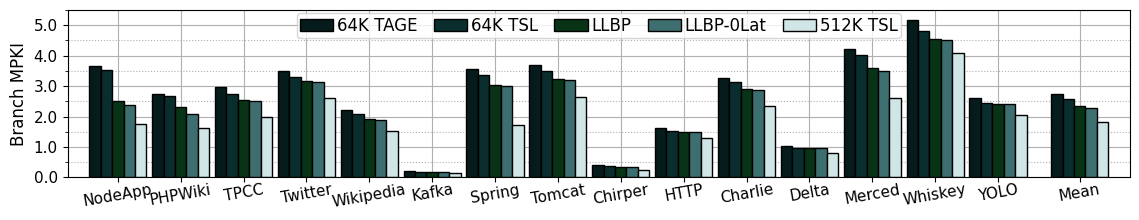

In [3]:


width = 0.7       # the width of the bars: can also be len(x) sequence


cw=11.5
fs=12

fig, axs = plt.subplots(1, 1, figsize=(cw,cw*0.2), sharex=True, sharey=False)

_bms = [b[1] for b in bms] + ["Mean"]

x = np.array([x_+0.3 if l in ["GMean", "Mean"] else x_ for x_,l in enumerate(_bms)])

colors = {
    '64K TAGE' : '#061b1c',
    '64K TSL' : '#0a2d2e',
    "512K TSL" : '#cfe5e6',
    "LLBP" : '#093316',
    "LLBP-0Lat" : '#3e6f70',
}


plot_models = [

    "64K TAGE",
    "64K TSL",
    "LLBP",
    "LLBP-0Lat",
    "512K TSL",
]


nbars = len(plot_models)
bar_width = float(1) / float(nbars+0.5)
init_offset = float(-nbars*bar_width) / 2
get_offset = lambda n : init_offset + n * bar_width


ax = axs

m = "MPKI"

for i, model in enumerate(plot_models):

    # if i == 0:
    #     continue


    dftmp = dfall[dfall["Model"] == model].set_index("Benchmark")

    y = dftmp.loc[_bms, m].values
    print(f"\n{model} MPKIs:")
    print()
    for benchmark, value in zip(_bms, y):
        print(f"{benchmark}: {value:.2f}")


    ax.bar(x+get_offset(i), y, width=bar_width, bottom=0, #hatch=hatches[j],
            color=colors[model], label=model,
            align='edge', edgecolor='k',zorder=2.3)





## Grid
ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
ax.grid(True, which='both')
ax.grid(True, which='minor', linestyle=':')

ax.set_ylabel("Branch MPKI", fontsize=fs)

_y = ax.get_yticks()
ax.set_yticks(_y)
ax.set_yticklabels([f"{y:.1f}" for y in _y], fontsize=fs-1)

# for container in ax.containers:
#     ax.bar_label(container, fontsize=7, fmt="%.2f", rotation=90)


## Format x-axis
ax.set_xticks(x)
ax.set_xticklabels(_bms, rotation=10, horizontalalignment="center", fontsize=fs-1)
ax.tick_params(axis='x', which='major', pad=0)

ax.set_ylim(bottom=-0.0, top=5.5)



handles, labels = ax.get_legend_handles_labels()

ax.legend(handles, labels, bbox_to_anchor=(0.5,1.03), loc="upper center", fontsize=fs, ncol=8,
            labelspacing=0.05, columnspacing=1.,handletextpad=0.2,borderpad=0.2,frameon=True)

# ax.legend(loc="best", fontsize="9", )
ax.set_xlim(left=x[0]-0.8, right=x[-1]+0.8)





fig.tight_layout()


fig.savefig("mpki.pdf",dpi=300,format="pdf",bbox_inches='tight', pad_inches=0, facecolor="w")
# fig.savefig("performance_study.png",dpi=300,bbox_inches='tight', pad_inches=0, facecolor="w")

## MPKI Reduction

64K TSL
LLBP
LLBP-0Lat
512K TSL


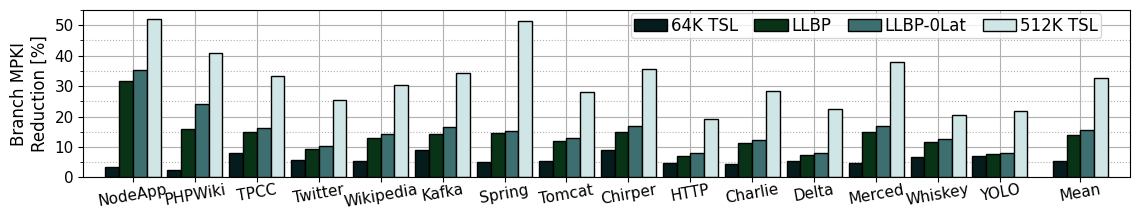

In [4]:


width = 0.7
cw=11.5
fs=12

fig, axs = plt.subplots(1, 1, figsize=(cw,cw*0.2), sharex=True, sharey=False)

_bms = [b[1] for b in bms] + ["Mean"]

x = np.array([x_+0.3 if l in ["GMean", "Mean"] else x_ for x_,l in enumerate(_bms)])

colors = {
    '64K TSL' : '#061b1c',
    "LLBP" : '#093316',
    "LLBP-0Lat" : '#3e6f70',
    "512K TSL" : '#cfe5e6'
}

plot_models = [
    "64K TSL",
    "LLBP",
    "LLBP-0Lat", 
    "512K TSL"
]

nbars = len(plot_models)
bar_width = float(1) / float(nbars+0.5)
init_offset = float(-nbars*bar_width) / 2
get_offset = lambda n : init_offset + n * bar_width

ax = axs

# Get baseline (TAGE) MPKI values
tage_df = dfall[dfall["Model"] == "64K TAGE"].set_index("Benchmark")
tage_mpki = tage_df.loc[_bms, "MPKI"].values

# Plot reduction compared to TAGE
for i, model in enumerate(plot_models):
    print(model)
    dftmp = dfall[dfall["Model"] == model].set_index("Benchmark")
    model_mpki = dftmp.loc[_bms, "MPKI"].values
    
    # Calculate reduction compared to TAGE
    reduction = (tage_mpki - model_mpki) / tage_mpki

    ax.bar(x+get_offset(i), reduction, width=bar_width, bottom=0,
            color=colors[model], label=model,
            align='edge', edgecolor='k',zorder=2.3)





## Grid
ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
ax.grid(True, which='both')
ax.grid(True, which='minor', linestyle=':')

ax.set_ylabel("Branch MPKI\nReduction [%]", fontsize=fs)

_y = ax.get_yticks()
ax.set_yticks(_y)
ax.set_yticklabels([f"{y*100:.0f}" for y in _y], fontsize=fs-1)

# for container in ax.containers:
#     ax.bar_label(container, fontsize=7, fmt="%.3f", rotation=90)


## Format x-axis
ax.set_xticks(x)
ax.set_xticklabels(_bms, rotation=10, horizontalalignment="center", fontsize=fs-1)
ax.tick_params(axis='x', which='major', pad=0)

ax.set_ylim(bottom=-0.0, top=0.55)



handles, labels = ax.get_legend_handles_labels()

ax.legend(handles, labels, bbox_to_anchor=(0.98,1.03), loc="upper right", fontsize=fs, ncol=8,
            labelspacing=0.05, columnspacing=1.,handletextpad=0.2,borderpad=0.2,frameon=True)

ax.set_xlim(left=x[0]-0.8, right=x[-1]+0.8)





fig.tight_layout()


fig.savefig("mpki_reduction.pdf",dpi=300,format="pdf",bbox_inches='tight', pad_inches=0, facecolor="w")